_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 256)         590080    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 256)         0         
__________

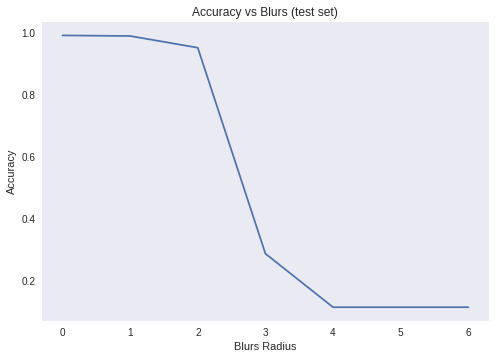

In [0]:

import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Conv2D, MaxPooling2D 
from keras.utils import np_utils
from keras.optimizers import SGD
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist 
import matplotlib.pyplot as plt

from PIL import Image
from PIL import ImageFilter

num_classes = 10

(x_train, y_train), (x_test, y_test) = mnist.load_data()



x_train_temp = []
x_test_temp = []
x_test_temp_rotate = []

for i in range(len(x_train)):
	X_trainImage = Image.fromarray(x_train[i])
	new_image = X_trainImage.resize((32,32), Image.HAMMING)
	img_array = new_image.convert('L')
	img_array = np.array(img_array)
	x_train_temp.append(img_array)


x_train = np.array(x_train_temp)


img_rows, img_cols = 32, 32


if K.image_data_format() == 'channels_first':
	x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
	input_shape = (1, img_rows, img_cols)
else:
	x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
	input_shape = (img_rows, img_cols, 1)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_train /= 255 #normalize to avoid overfitting

model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))


model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))


model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))

 
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))


model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2))) 

model.add(Flatten()) 

 
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(512, activation='relu'))

model.add(Dense(10, activation='softmax'))

print(model.summary())

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=1)

scores = []
blurs = [0, 1, 2, 3, 4, 5, 6]

for bl in blurs:
	x_test_temp_rotate = []
	print("Testing model with rotation", bl)
	for i in range(len(x_test)):
		X_trainImage = Image.fromarray(x_test[i])
		new_image = X_trainImage.resize((32,32), Image.HAMMING)
	
		
		image_blur = new_image.filter(ImageFilter.GaussianBlur(radius=bl))
		
		img_array_rot = image_blur.convert('L')
		x_test_temp_rotate.append(np.array(img_array_rot))
		
	x_test_rotated = np.array(x_test_temp_rotate)

	
	if K.image_data_format() == 'channels_first':
		x_test_rotated = x_test_rotated.reshape(x_test_rotated.shape[0], 1, img_rows, img_cols)
	else:
		x_test_rotated = x_test_rotated.reshape(x_test_rotated.shape[0], img_rows, img_cols, 1)
		
	
	x_test_rotated = x_test_rotated.astype('float32')
	x_test_rotated /= 255 #normalise to avoid overfit

	score = model.evaluate(x_test_rotated, y_test, batch_size=32)
	scores.append(score)

scores = np.array(scores)
print(scores)

blur_lab = ['0', '1', '2', '3', '4', '5', '6']


plt.plot(blurs, scores[:,1])
plt.xticks(blurs, blur_lab)
plt.title('Accuracy vs Blurs (test set)')
plt.ylabel('Accuracy')
plt.xlabel('Blurs Radius')
plt.grid()
plt.show()















